In [1]:
# import the numpy and pandas libraries
import numpy as np
import pandas as pd
import string as str

#read in the churn data set as a pandas dataframe
df = pd.read_csv('churn_raw_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [2]:
#get an inital look at the data
df.head()



,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [3]:
#check to see if the first column is identical to CaseOrder
df['Unnamed: 0'].equals(df['CaseOrder'])

True

In [4]:

#it returns true so we can drop the first unnamed column
new_df = df.drop(['Unnamed: 0'], axis=1)

#replace non asci characters
new_df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

new_df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [5]:
# make sure all the numbers that need to be rounded are consistnent
new_df = new_df.round({'Age': 0,'Tenure':2,'MonthlyCharge':2,'Bandwidth_GB_Year':2,'Outage_sec_perweek':2,'Income':2}) # round Age to nearest integer


In [6]:
# find the number of NaNs in each column

new_df.isna().sum()



CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [7]:
# we see that Children,Age,Income,Techie,Phone,TechSupport,Tenure and Bandwidth_GB_Year all have NaNs

In [8]:

#number of unique rows in each column
new_df[new_df.columns].nunique()


#this verifys all unique identifiers are unique


CaseOrder               10000
Customer_id             10000
Interaction             10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8655
Population               5933
Area                        3
Timezone                   25
Job                       639
Children                   11
Age                        72
Education                  12
Employment                  5
Income                   7506
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       1929
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBack

In [9]:
#make sure the states are consistently length as initals

state_length = new_df['State'].str.len()
assert state_length.mean() == 2
assert state_length.min() == 2

In [10]:
#strips leading and trailing spaces
string_list = list(new_df.select_dtypes(include = {'object'}))
for i in string_list:
    new_df[i] = new_df[i].str.strip()

In [11]:
#make sure there are no duplicte rows when the unique identifiers are left out.

duplicates = new_df.duplicated(subset = ['City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'], keep = False)

new_df[duplicates]


,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [12]:
#impute the Techie,TechSupport,Phone columns with the mode of No as they are categorical assuming if it's blank than it is a no
str_mode = max(list(new_df['Techie']),key=list(new_df['Techie']).count)
new_df['Techie'].fillna(str_mode, inplace = True)

str_mode = max(list(new_df['TechSupport']),key=list(new_df['TechSupport']).count)
new_df['TechSupport'].fillna(str_mode, inplace = True)

# impute phone with No
new_df['Phone'].fillna('No',inplace = True)


In [13]:
# impute age,income, tenure and Bandwidth_GB_Year with the average
new_df['Age'].fillna(new_df['Age'].mean(), inplace = True)
new_df['Income'].fillna(new_df['Income'].mean(), inplace = True)
new_df['Tenure'].fillna(new_df['Tenure'].mean(), inplace = True)
new_df['Bandwidth_GB_Year'].fillna(new_df['Bandwidth_GB_Year'].mean(), inplace = True)

In [14]:
#impute number of Children with 0
new_df['Children'].fillna(0,inplace = True)



new_df.isna().sum()
#now we have no more missing values

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

In [15]:
# making sure the categories with yes/no values are consistent
category_column_name = ['Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']


for i in category_column_name:
    print(i,':',new_df[i].unique(),'\n')

Phone : ['Yes' 'No'] 

Multiple : ['No' 'Yes'] 

OnlineSecurity : ['Yes' 'No'] 

OnlineBackup : ['Yes' 'No'] 

DeviceProtection : ['No' 'Yes'] 

TechSupport : ['No' 'Yes'] 

StreamingTV : ['No' 'Yes'] 

StreamingMovies : ['Yes' 'No'] 

PaperlessBilling : ['Yes' 'No'] 



In [16]:
# detecting outliers
import matplotlib.pyplot as plt
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  float64
 14  Age                   10000 non-null  float64
 15  Education           

In [17]:
#Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year

col_num_names = ['Lng','Lat','Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']



for i in col_num_names:
    print(new_df[i].name,"min is ", new_df[i].min(),"max is ",new_df[i].max(),"\n")

Lng min is  -171.68815 max is  -65.66785 

Lat min is  17.96612 max is  70.64066 

Population min is  0 max is  111850 

Children min is  0.0 max is  10.0 

Age min is  18.0 max is  89.0 

Income min is  740.66 max is  258900.7 

Outage_sec_perweek min is  -1.35 max is  47.05 

Email min is  1 max is  23 

Contacts min is  0 max is  7 

Yearly_equip_failure min is  0 max is  6 

Tenure min is  1.0 max is  72.0 

MonthlyCharge min is  77.51 max is  315.88 

Bandwidth_GB_Year min is  155.51 max is  7158.98 



In [18]:
#first off we can see that a population cannot have 0




# we can see from this that Population,Children,Income,Outage_sec_perweek,email, and Bandwidth_GB_Year may have outliers






count = (new_df['Population']==0).sum()
perc = (count/len(new_df['Population']))*100
print(perc)

0.97


In [19]:
#less than 1 percent of the data so we can remove the zeros from population
new_df.drop(new_df[new_df['Population'] == 0].index, inplace = True)

Text(0.5, 1.0, 'Population histogram')

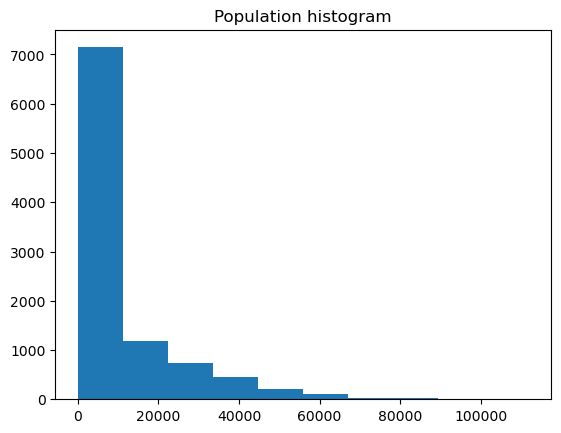

In [20]:
plt.hist(new_df['Population'])
plt.title('Population histogram')

Text(0.5, 1.0, 'Population boxplot')

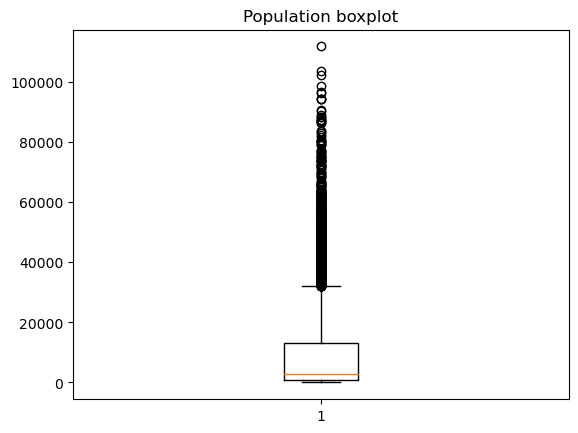

In [21]:
plt.boxplot(new_df['Population'])
plt.title('Population boxplot')

Text(0.5, 1.0, 'lat histogram')

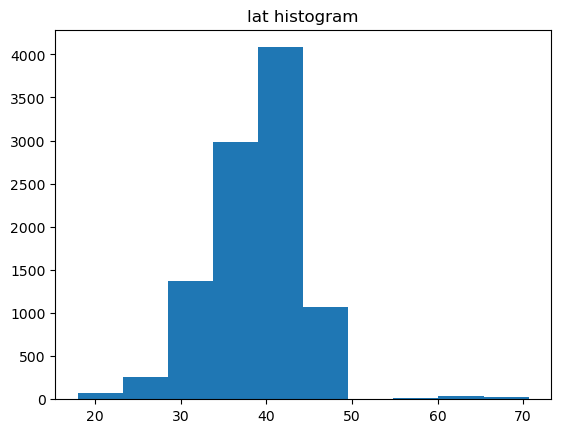

In [22]:
plt.hist(new_df['Lat'])
plt.title('lat histogram')

Text(0.5, 1.0, 'lng histogram')

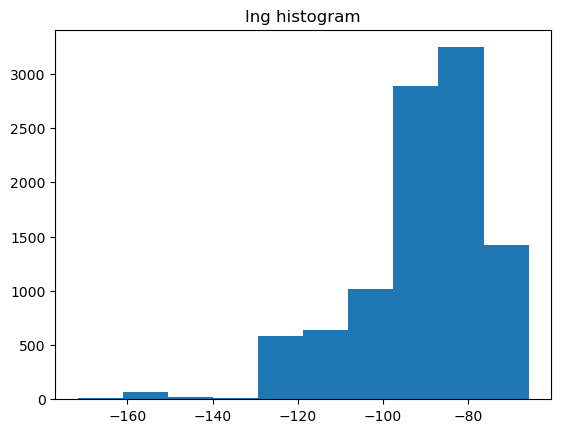

In [23]:
plt.hist(new_df['Lng'])
plt.title('lng histogram')

Text(0.5, 1.0, 'Children boxplot')

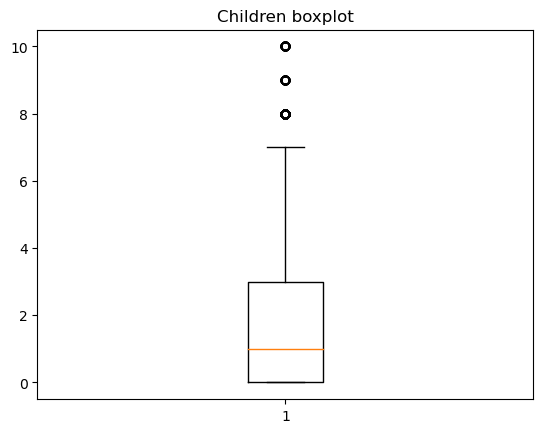

In [24]:

plt.boxplot(new_df['Children'])
plt.title('Children boxplot')

Text(0.5, 1.0, 'Age Histogram')

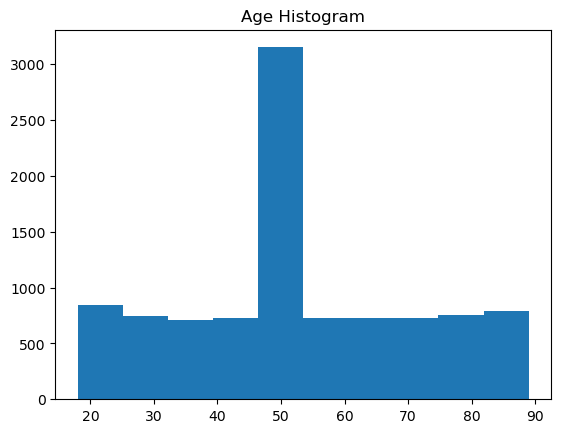

In [25]:
#above 8 are outliers but leave them in

plt.hist(new_df['Age'])
plt.title('Age Histogram')


Text(0.5, 1.0, 'Age boxplot')

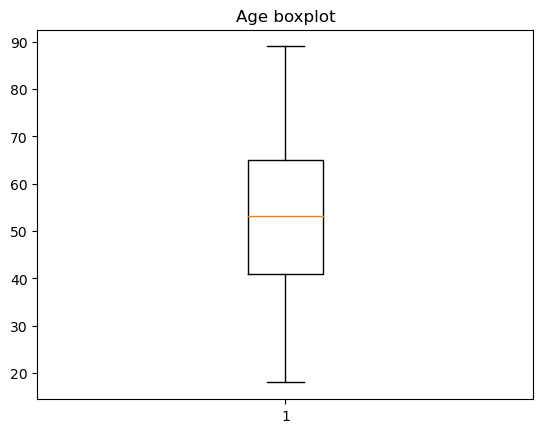

In [26]:

plt.boxplot(new_df['Age'])
plt.title('Age boxplot')
#no outliers in age

Text(0.5, 1.0, 'Income boxplot')

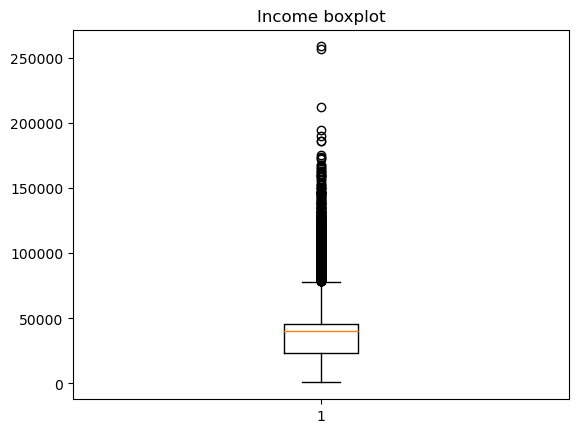

In [27]:
plt.boxplot(new_df['Income'])
plt.title('Income boxplot')

Text(0.5, 1.0, 'Income histogram')

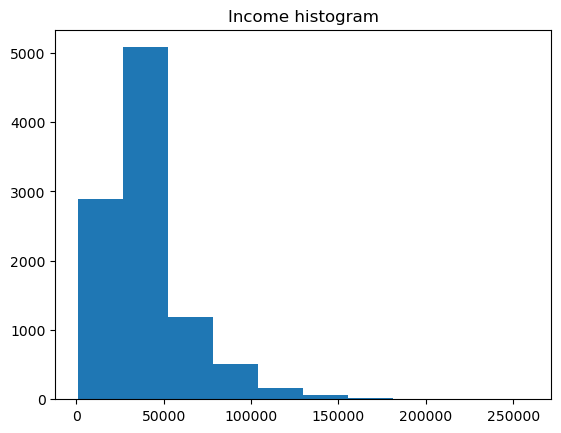

In [28]:
plt.hist(new_df['Income'])
plt.title('Income histogram')

Text(0.5, 1.0, 'Outage_sec_perweek Histogram')

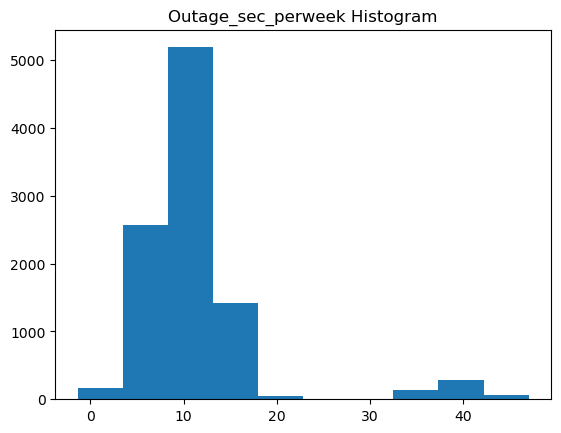

In [29]:
#income above 175,000 are outliers

plt.hist(new_df['Outage_sec_perweek'])
plt.title('Outage_sec_perweek Histogram')

In [30]:
# from the min max we can see that an Outage_sec_perweek cannot be negative and from the histogram above
# it is clear there is an outlier cluster that could be investigated as to why it is so high compared to the others
# from 33 to around 44/45
new_df['Outage_sec_perweek']=np.absolute(new_df['Outage_sec_perweek'])

In [31]:
print (new_df['Population'].name,"min is ", new_df['Population'].min())
print (new_df['Outage_sec_perweek'].name,"min is ", new_df['Outage_sec_perweek'].min())

Population min is  2
Outage_sec_perweek min is  0.11


Text(0.5, 1.0, 'Email_boxplot')

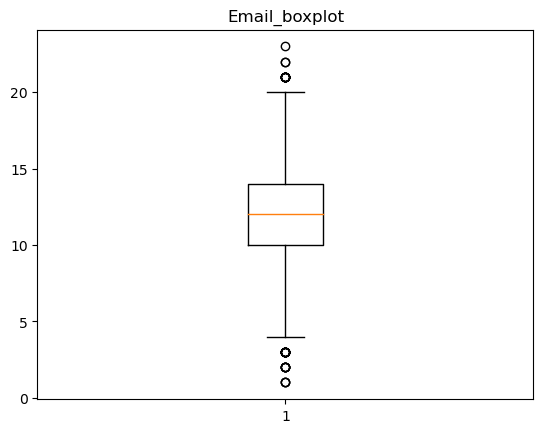

In [32]:
 

plt.boxplot(new_df['Email'])
plt.title('Email_boxplot')

Text(0.5, 1.0, 'Contacts_boxplot')

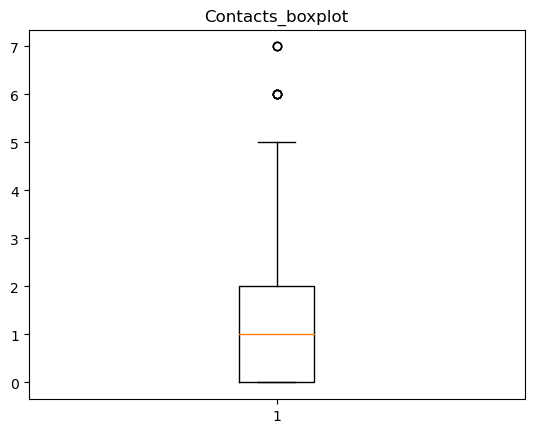

In [33]:
# the number of emails above 20 and below 4 ccould be consideered outliers

plt.boxplot(new_df['Contacts'])
plt.title('Contacts_boxplot')

Text(0.5, 1.0, 'Yearly_equip_failure_boxplot')

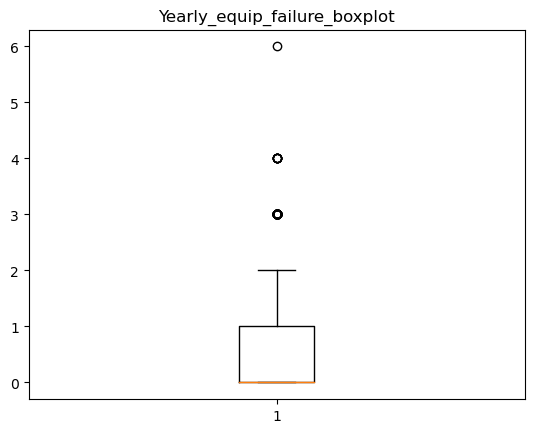

In [34]:
#contact 6,7 are outliers

plt.boxplot(new_df['Yearly_equip_failure'])
plt.title('Yearly_equip_failure_boxplot')

Text(0.5, 1.0, 'Yearly_equip_failure_histogram')

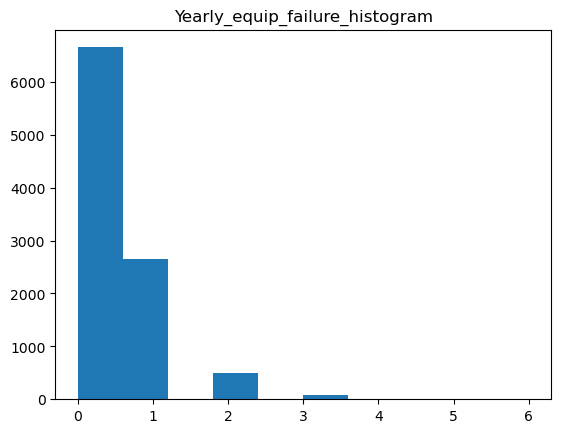

In [35]:
#above 3 are outliers
plt.hist(new_df['Yearly_equip_failure'])
plt.title('Yearly_equip_failure_histogram')


Text(0.5, 1.0, 'Tenure')

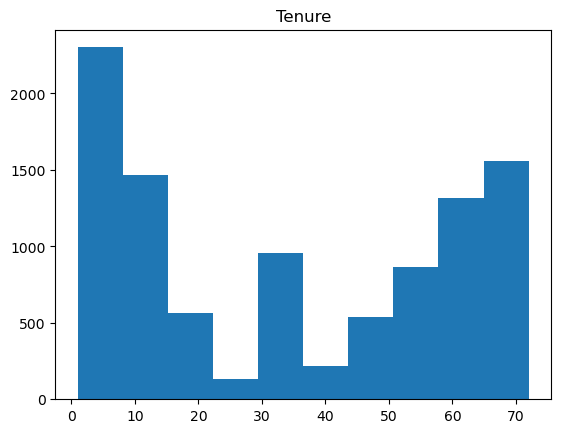

In [36]:
plt.hist(new_df['Tenure'])
plt.title('Tenure')

Text(0.5, 1.0, 'Tenure')

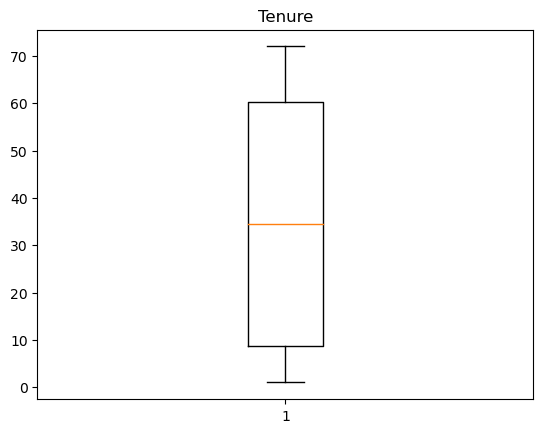

In [37]:
plt.boxplot(new_df['Tenure'])
plt.title('Tenure')
#no outliers for tenure

Text(0.5, 1.0, 'Bandwidth_GB_Year')

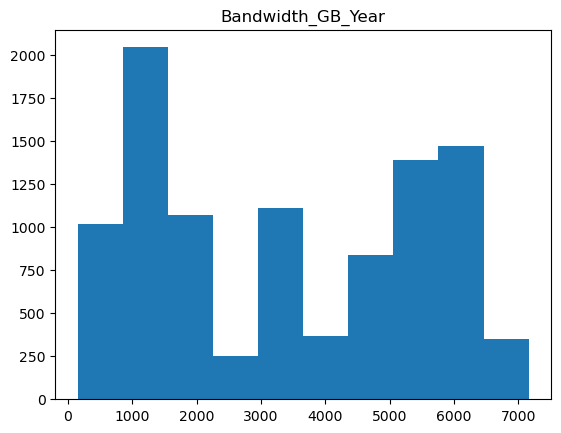

In [38]:
plt.hist(new_df['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year')

Text(0.5, 1.0, 'Bandwidth_GB_Year')

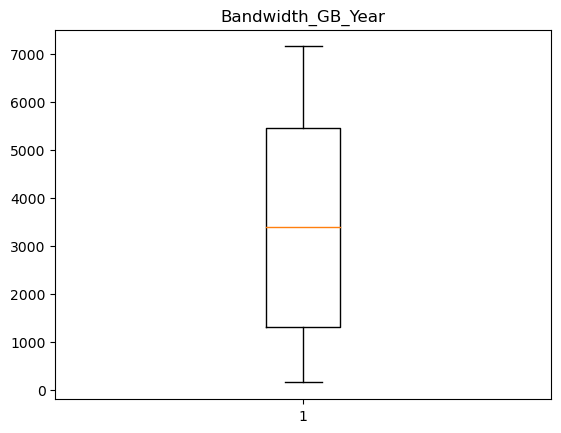

In [39]:
plt.boxplot(new_df['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year')

Text(0.5, 1.0, 'MonthlyCharge')

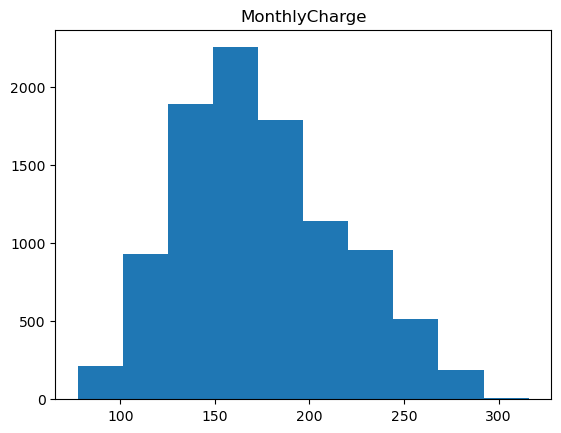

In [40]:
plt.hist(new_df['MonthlyCharge'])
plt.title('MonthlyCharge')

Text(0.5, 1.0, 'MonthlyCharge')

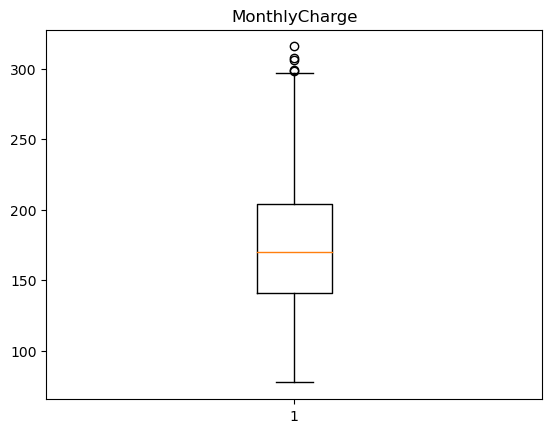

In [41]:
plt.boxplot(new_df['MonthlyCharge'])
plt.title('MonthlyCharge')

Text(0.5, 1.0, 'item1')

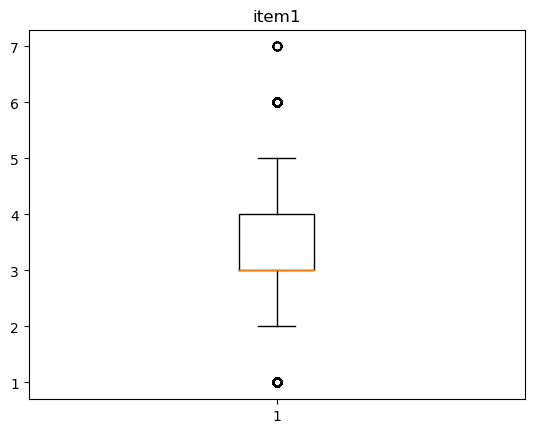

In [42]:
#above 300 are outlliers for monthly charge
plt.boxplot(new_df['item1'])
plt.title('item1')

Text(0.5, 1.0, 'item2')

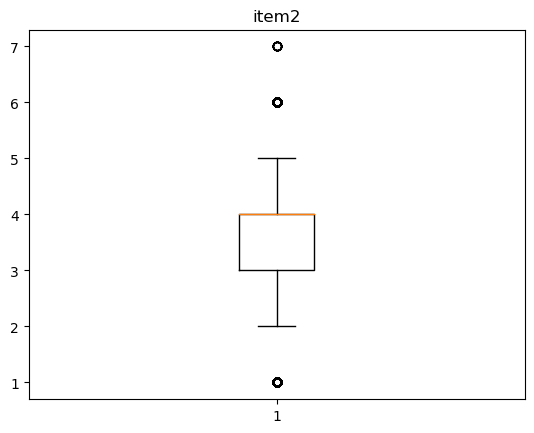

In [43]:
plt.boxplot(new_df['item2'])
plt.title('item2')

Text(0.5, 1.0, 'item3')

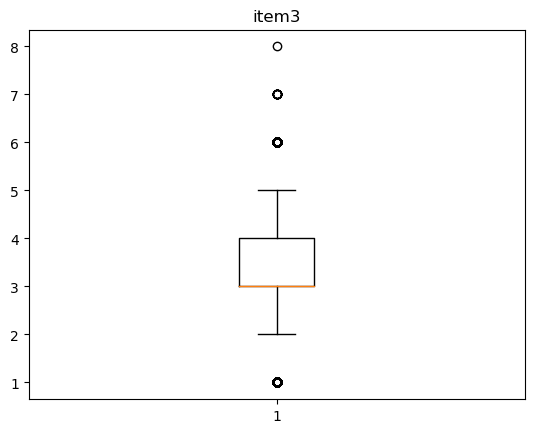

In [44]:
plt.boxplot(new_df['item3'])
plt.title('item3')

Text(0.5, 1.0, 'item4')

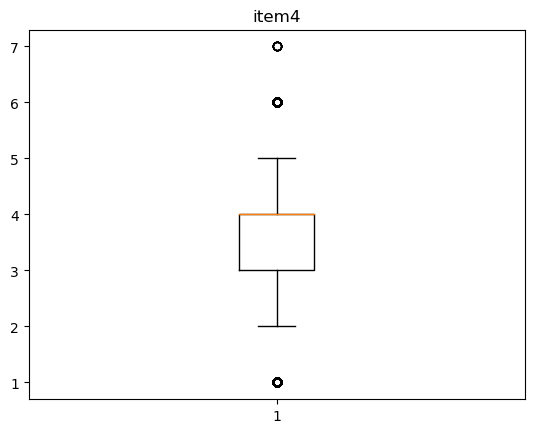

In [45]:
plt.boxplot(new_df['item4'])
plt.title('item4')

Text(0.5, 1.0, 'item5')

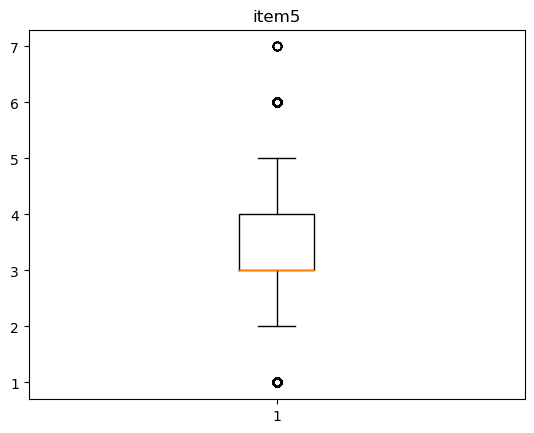

In [46]:
plt.boxplot(new_df['item5'])
plt.title('item5')

Text(0.5, 1.0, 'item6')

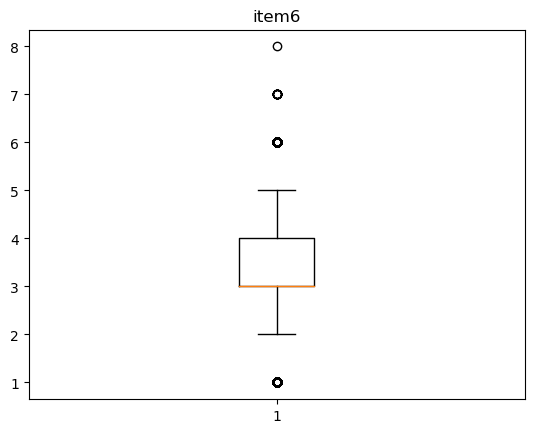

In [47]:
plt.boxplot(new_df['item6'])
plt.title('item6')

Text(0.5, 1.0, 'item7')

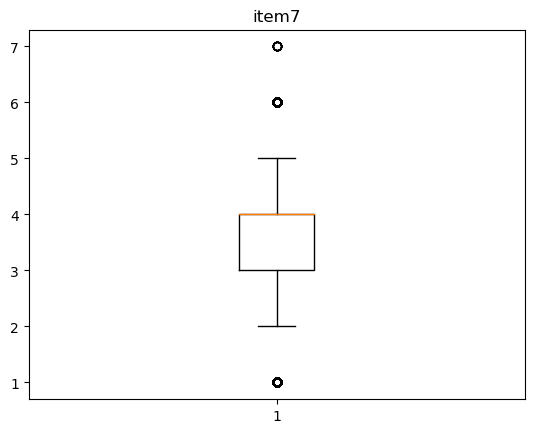

In [48]:
plt.boxplot(new_df['item7'])
plt.title('item7')

Text(0.5, 1.0, 'item8')

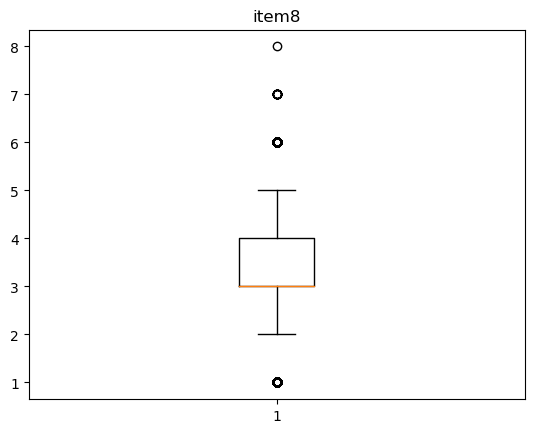

In [49]:
plt.boxplot(new_df['item8'])
plt.title('item8')

In [50]:
from sklearn.decomposition import PCA


numeric_list = list(new_df.select_dtypes(include = {'int64','float64'}))
del numeric_list[:2]
print(numeric_list)

['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']


In [51]:
pca_df = new_df[numeric_list]
pca_df.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,56.25100,-133.37571,38,0.0,68.0,28561.990000,6.97,10,0,1,...,171.45,904.54,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,1.0,27.0,21704.770000,12.01,12,0,1,...,242.95,800.98,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,4.0,50.0,39936.762226,10.25,9,0,1,...,159.44,2054.71,4,4,2,4,4,3,3,3
3,32.96687,-117.24798,13863,1.0,48.0,18925.230000,15.21,15,2,0,...,120.25,2164.58,4,4,4,2,5,4,3,3
4,29.38012,-95.80673,11352,0.0,83.0,40074.190000,8.96,16,2,1,...,150.76,271.49,4,4,4,3,4,4,4,5


In [52]:
#normalize
pca_df_normalized = (pca_df-pca_df.mean())/pca_df.std()

In [53]:
pca = PCA(n_components = pca_df.shape[1])
pca.fit(pca_df_normalized)

PCA(n_components=21)

In [54]:
pca_df_2 = pd.DataFrame(pca.transform(pca_df_normalized),columns =['PC1','PC2','PC3','PC4',
                                                                   'PC5','PC6','PC7','PC8',
                                                                   'PC9','PC10','PC11','PC12',
                                                                   'PC13','PC14','PC15','PC16',
                                                                   'PC17','PC18','PC19','PC20',
                                                                   'PC21'])

In [55]:
pd.set_option('display.max_columns', None)
loadings = pd.DataFrame(pca.components_.T,
                        columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21'],
                        index = pca_df_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Lat,-0.002743,-0.023845,-0.012798,-0.709381,-0.082707,0.132650,-0.012403,-0.071136,0.002831,0.091843,0.020731,-0.016531,-0.007769,-0.092578,0.660783,0.095006,-0.049721,-0.005960,0.018043,-0.010690,0.001442
Lng,0.006610,0.011489,0.025363,0.175537,0.068258,-0.744696,-0.387639,0.028456,-0.050098,-0.258703,-0.059239,0.192201,0.058841,-0.074985,0.363005,0.068999,-0.040543,0.017176,0.000216,-0.024833,0.001521
Population,-0.001339,0.004471,0.019963,0.644486,0.059524,0.302944,0.241113,0.049064,0.089674,0.026132,0.013684,-0.137098,-0.005949,-0.168701,0.601964,0.097338,-0.015510,-0.001915,0.000285,-0.008557,-0.000095
Children,-0.000351,-0.001836,0.011201,-0.045143,0.042804,-0.516366,0.343090,0.016814,0.121360,0.414926,0.203983,-0.615264,0.030157,0.034512,0.000022,-0.035984,0.015399,0.009708,0.015702,-0.010060,-0.015761
Age,0.005084,-0.012958,-0.017013,0.020782,-0.053485,0.115897,-0.451734,0.514720,-0.124552,0.340916,-0.521081,-0.308130,0.099995,-0.065979,-0.008935,0.009418,0.004557,-0.015933,0.008158,0.016189,0.021454
Income,-0.001695,0.004590,0.024272,-0.058867,-0.025427,-0.092197,0.160589,0.326192,0.813582,0.127152,-0.182266,0.365864,-0.072003,0.015697,-0.005330,-0.061428,0.002042,0.001681,0.012837,0.004259,0.001346
Outage_sec_perweek,-0.013389,0.017755,-0.045899,-0.101813,0.692163,0.069588,0.065261,0.035041,0.035175,-0.009569,0.013882,0.066022,0.690736,-0.111534,-0.038375,0.012077,0.012156,-0.016873,0.010654,-0.003487,0.000572
Email,0.007398,-0.020356,-0.003043,0.152570,0.104344,0.001214,-0.264068,-0.460741,-0.017828,0.743886,0.038594,0.347683,-0.044305,0.058690,0.035952,-0.010093,0.010941,0.007554,-0.016638,0.000522,0.005413
Contacts,-0.008799,0.005077,-0.010909,0.032240,-0.006353,0.168602,-0.505665,0.268712,0.233107,-0.000349,0.754419,-0.117209,0.019265,0.049043,0.003474,-0.036957,0.000540,-0.024301,0.019713,-0.000989,-0.002701
Yearly_equip_failure,-0.008617,0.015935,0.007445,-0.020578,0.049673,-0.095083,0.324211,0.575115,-0.485935,0.235581,0.252554,0.424003,-0.114908,0.024719,0.044548,0.012907,0.012078,-0.000369,0.007059,-0.021294,-0.002303


In [56]:
cov_matrix = np.dot(pca_df_normalized.T, pca_df_normalized) / pca_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
eigenvalues

[2.945261775965848,
 1.9000110270367212,
 1.6388641485288282,
 1.2393413761075498,
 1.1317600562680425,
 1.0495805669018088,
 1.038718806652489,
 1.0150838041984123,
 1.0053462533839772,
 0.9869253015533936,
 0.9801747537697965,
 0.9620879883656076,
 0.864810724246066,
 0.779343253495618,
 0.7322003007699835,
 0.689879240052717,
 0.5925412953537149,
 0.5369779529356058,
 0.4816266660285105,
 0.3241672754814431,
 0.10317686337970466]

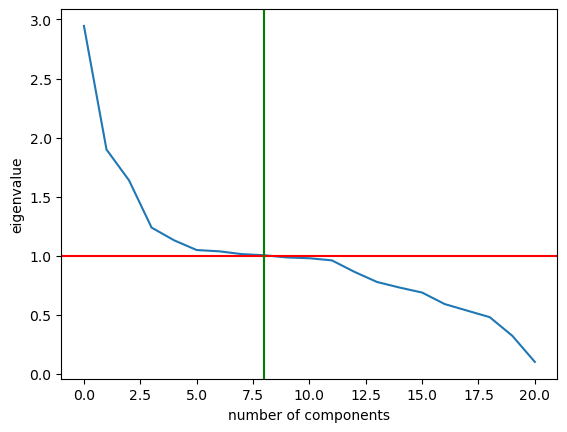

In [57]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y = 1, color = 'red')
plt.axvline(x=8,color = 'green')
plt.show() 

In [58]:
new_df.to_csv('clean_churn_file.csv', index=False)